# Intermittent Search Using Active Filaments
Plot and analysis of intermittent search programs for active filaments

In [1]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')
# Create a folder for storing Publication figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure5'

if not os.path.exists(publication_figures):
    os.makedirs(publication_figures)

import _figure_parameters

linux system
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', '

In [4]:
file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2022-03-18/SimData_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.7_activityTime_500_simType_point/sim_data_09_.hdf5'

filament = analysis.analysisTools(file = file)


In [67]:
max_time_index = len(filament.Time)
print(max_time_index)

6001


## Plotting parameters

In [5]:
start_index = 100
end_index = 2000

filament_stride = 50
tip_stride = 5


# Compute the Tip velocity
filament.compute_tip_velocity() 

delta_T = filament.Time[1] - filament.Time[0]

N_t_cycle = int(filament.activity_timescale/delta_T) # No:of time points per cycle
time_points = np.array(range(0, filament.Nt))

# Find the time indices we are plotting
indices_to_plot = time_points[start_index:end_index:filament_stride]
indices_to_plot_tip = time_points[start_index:end_index:tip_stride]

# Store the filament shapes we want to plot and activity profile
filament_shapes = filament.R[indices_to_plot,:]
activity_profile = filament.activity_profile[indices_to_plot]
activity_state_profile = filament.activity_state_array[indices_to_plot]

# Find the non-dimensional tip speed
tip_speed_nd = filament.derived_data['tip speed'][indices_to_plot_tip]/filament.velocity_scale

## Filament shapes

<IPython.core.display.Javascript object>


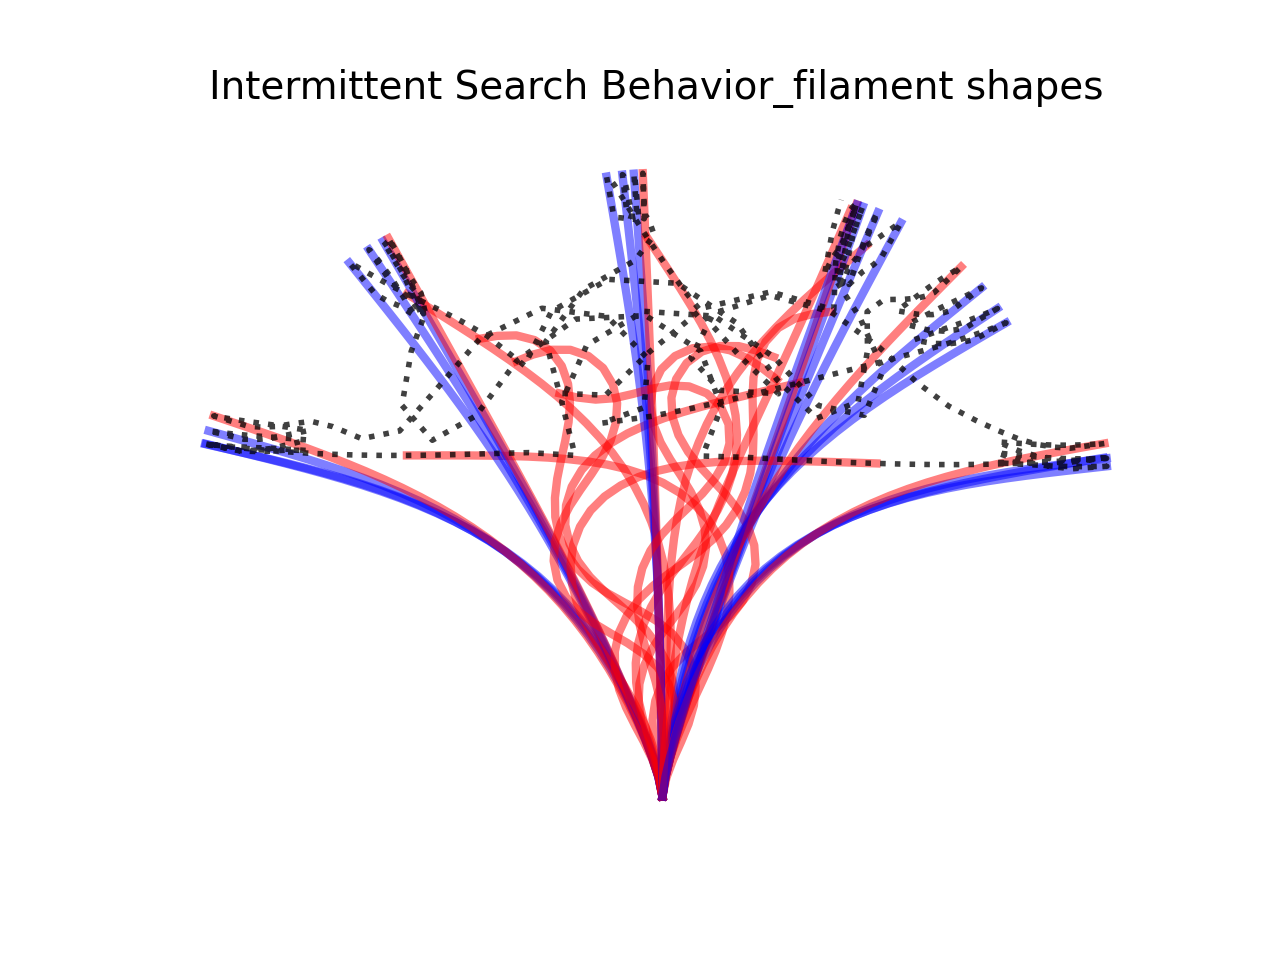

In [8]:

save = True

plt.figure()
title = "Intermittent Search Behavior_filament shapes"
for ii in range(len(indices_to_plot)):
    
    time = filament.Time[indices_to_plot[ii]]
    
    activity = activity_profile[ii]
    
    r = filament_shapes[ii]
    
   
    first_index = 0
    second_index = filament.Np
    
    x_pos = r[first_index:first_index+filament.Np]
    y_pos = r[second_index:second_index+filament.Np]
    
    state = activity_state_profile[ii]
    
    if state == 0:
        # low freq
        plt.plot(y_pos, x_pos, color = 'r', alpha = 0.5, zorder = 0, linewidth = 3)
    else:
        # high freq
        plt.plot(y_pos, x_pos, color = 'b', alpha = 0.5, zorder = 0, linewidth = 3)

        

    
#     if(activity>0):
#         plt.plot(y_pos, x_pos, color = 'b', alpha = 0.5, zorder = 0, linewidth = 3)
#     elif(activity<=0):
        
#         plt.plot(y_pos, x_pos, color = 'r', alpha = 0.5, zorder = 0, linewidth = 3)

    
# Add the tip locations, Colored by Speed
# ax2 = plt.scatter(filament.derived_data['head pos y'][indices_to_plot_tip], 
#                   filament.derived_data['head pos x'][indices_to_plot_tip], 10, c = tip_speed_nd, 
#                   cmap = cmocean.cm.speed, alpha = 1, zorder = 5)

ax3 = plt.plot(filament.derived_data['head pos y'][indices_to_plot_tip], 
                  filament.derived_data['head pos x'][indices_to_plot_tip], zorder = 4, color ='k', alpha = 0.75, linewidth = 2, linestyle=':')
plt.axis('equal')

plt.title(title)

plt.axis('off')

# cbar = plt.colorbar(orientation='horizontal')
# cbar.set_label('Tip speed (dimensionless)')

if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
    
plt.show()

<IPython.core.display.Javascript object>


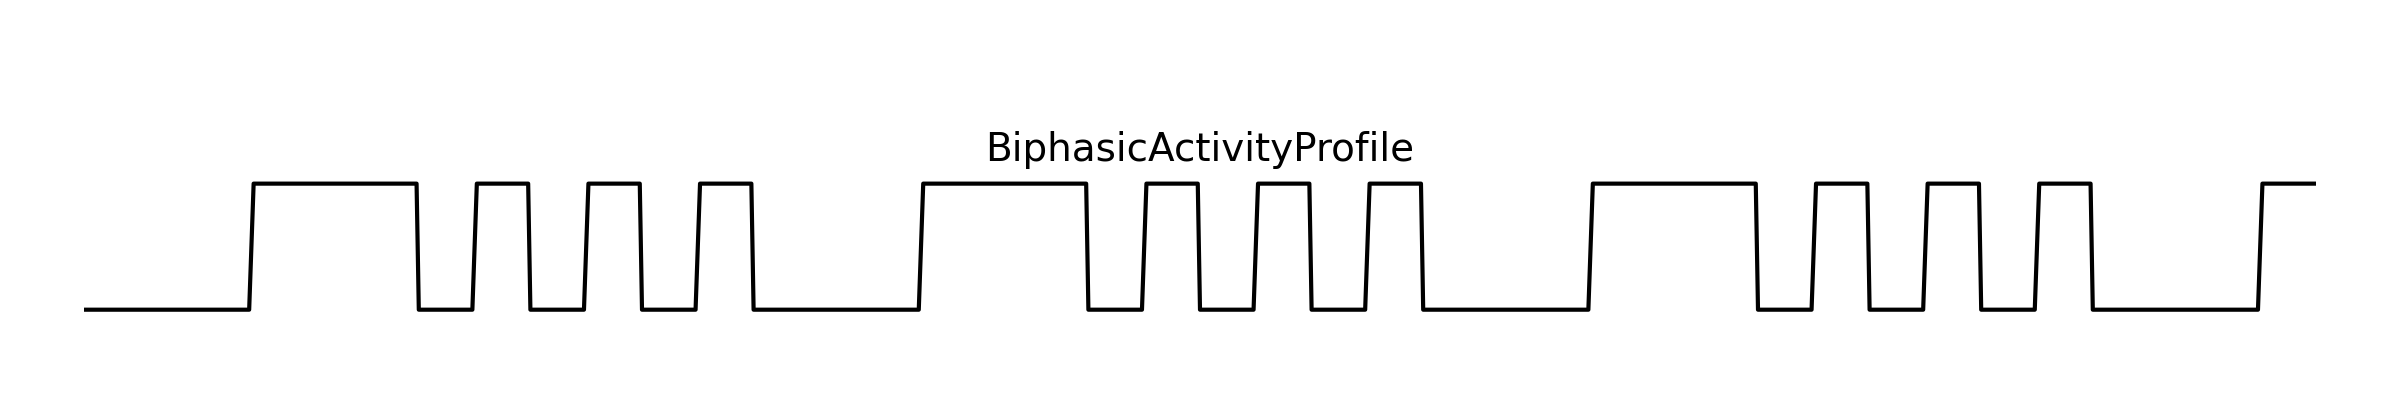

In [77]:
# Plot the activity profile
save = False
plt.figure(figsize=(6,1))
title = 'BiphasicActivityProfile'
plt.plot(filament.Time, filament.activity_profile, 'k-')
plt.xlim(0,5000)
plt.title(title)
plt.axis('off')
plt.tight_layout()
if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

plt.show()

## Filament tip trajectory

<IPython.core.display.Javascript object>


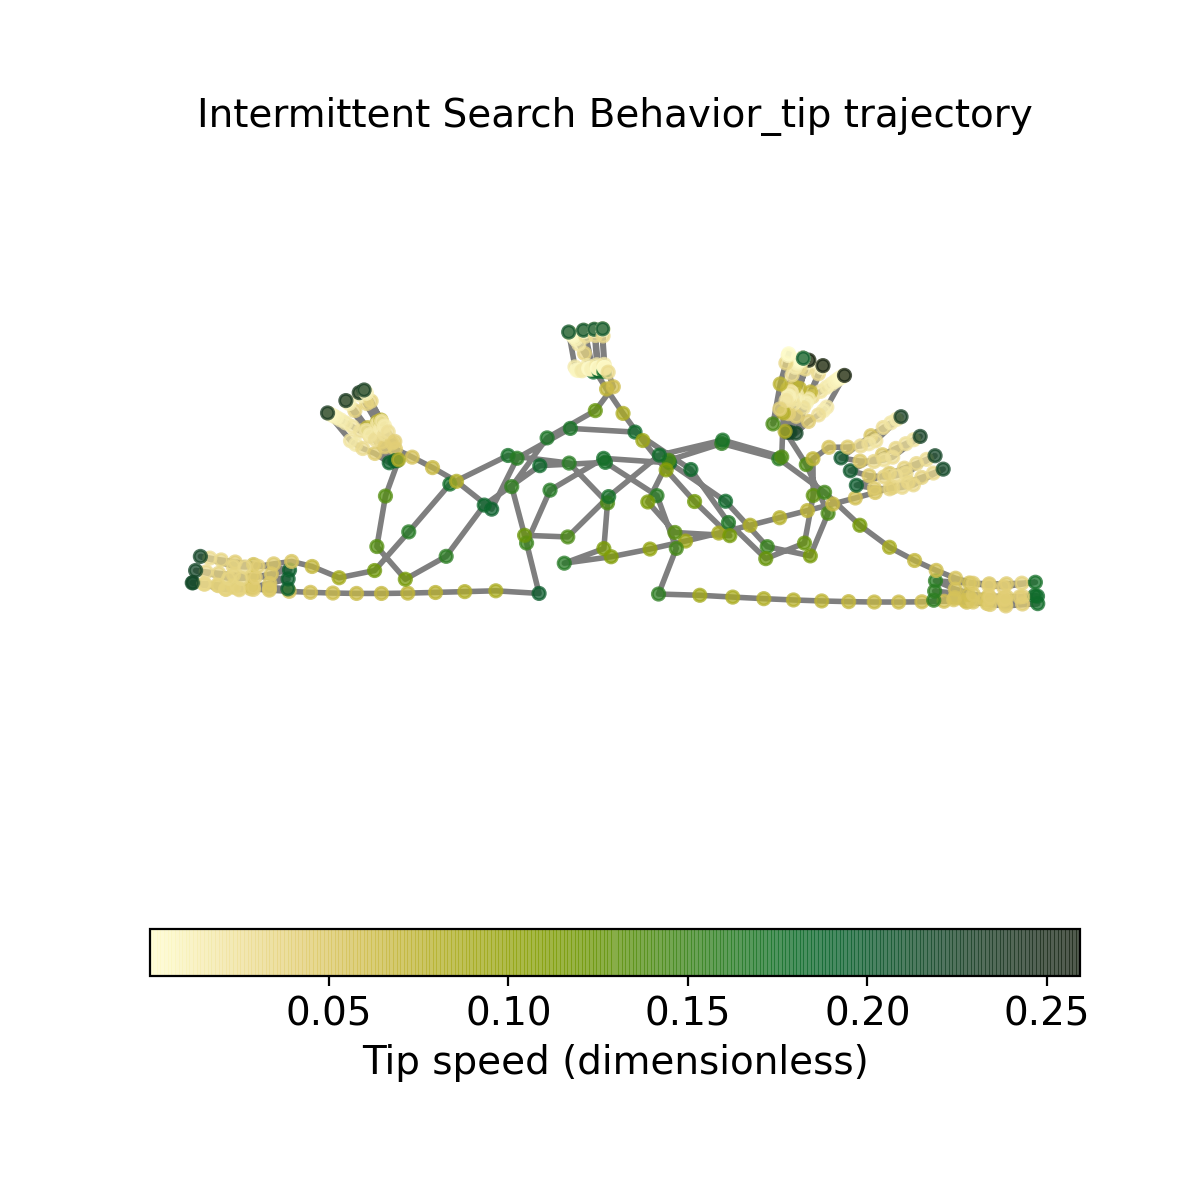

In [9]:
save = True
plt.figure(figsize=(6,6))
title = "Intermittent Search Behavior_tip trajectory"

# Add the tip locations, Colored by Speed
ax2 = plt.scatter(filament.derived_data['head pos y'][indices_to_plot_tip], 
                  filament.derived_data['head pos x'][indices_to_plot_tip], 20, c = tip_speed_nd, 
                  cmap = cmocean.cm.speed, alpha = 0.75, zorder = 5)

ax3 = plt.plot(filament.derived_data['head pos y'][indices_to_plot_tip], 
                  filament.derived_data['head pos x'][indices_to_plot_tip], zorder = 4, color ='k', alpha = 0.5, linewidth = 2, linestyle = '-')
plt.axis('equal')

plt.title(title)

plt.axis('off')

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Tip speed (dimensionless)')

if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
    
plt.show()

In [76]:
filament.activity_profile

array([-1., -1., -1., ...,  1.,  1., -1.])